# Manish Kumar Gupta
### Data Science and Business Analytics Intern

## Prediction Using K means Clustering

In [2]:
# Importing required libraries for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
# Loading the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Deciding optimum number of clusters

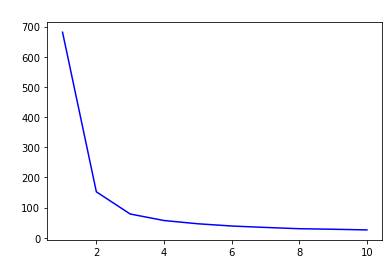

In [10]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = [] # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Visualizing the result
plt.plot(range(1, 11), wcss, color = "blue")
plt.title('The elbow method', color = "white")
plt.xlabel('Number of clusters', color = "white")
plt.ylabel('WCSS', color = "white") # Within cluster sum of squares
plt.show()

The optimum number of cluters are where the elbow is formed. Here, we can see that the elbow occurs around 3.

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
the_kmeans = kmeans.fit_predict(x)

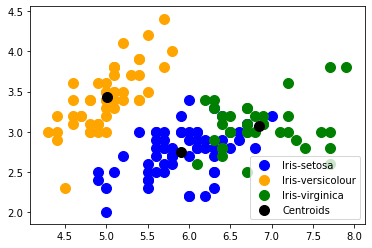

In [13]:
plt.scatter(x[the_kmeans == 0, 0], x[the_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[the_kmeans == 1, 0], x[the_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[the_kmeans == 2, 0], x[the_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

As it can be seen that there are 3 clusters - Iris Setosa, Iris Versicular, Iris Verginica each having a centroid represented with a black dot